In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [9]:
def prepare_data(dataset, no_features):
  n = len(dataset)
  training, test = [], []
  for start_idx in range(n):
    end_idx = start_idx + no_features
    if end_idx > n - 1:
      break
    seq_x, seq_y = dataset[start_idx:end_idx], dataset[end_idx]
    training.append(seq_x)
    test.append(seq_y)
  return np.array(training), np.array(test)

In [10]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [11]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [12]:
X.shape

(6, 3)

In [13]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
# convert into  3D
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(6, 3, 1)

#Building LSTM Model

In [17]:
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(n_steps, n_features)))
model.add(LSTM(20,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(X,y,epochs=500,verbose=1)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 29019.5020
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 28238.2871
Epoch 3/500
1/1 [==============================] - 0s 16ms/step - loss: 27718.0137
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 27329.3906
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 27001.9375
Epoch 6/500
1/1 [==============================] - 0s 16ms/step - loss: 26694.1504
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 26386.6895
Epoch 8/500
1/1 [==============================] - 0s 16ms/step - loss: 26073.1465
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 25750.3906
Epoch 10/500
1/1 [==============================] - 0s 19ms/step - loss: 25418.9141
Epoch 11/500
1/1 [==============================] - 0s 28ms/step - loss: 25083.1094
Epoch 12/500
1/1 [==============================] - 0s 17ms/step - loss: 24746.1465
Epo

#Prediction

In [21]:
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[222.79724]
1 day input [196.         210.         222.79724121]
1 day output [[233.83044]]
2 day input [210.         222.79724121 233.83044434]
2 day output [[248.07707]]
3 day input [222.79724 233.83044 248.07707]
3 day output [[261.629]]
4 day input [233.83044 248.07707 261.629  ]
4 day output [[275.1403]]
5 day input [248.07707 261.629   275.1403 ]
5 day output [[290.6714]]
6 day input [261.629  275.1403 290.6714]
6 day output [[306.0943]]
7 day input [275.1403 290.6714 306.0943]
7 day output [[322.24954]]
8 day input [290.6714  306.0943  322.24954]
8 day output [[339.8473]]
9 day input [306.0943  322.24954 339.8473 ]
9 day output [[357.8709]]
[222.79724, 233.83044, 248.07707, 261.629, 275.1403, 290.6714, 306.0943, 322.24954, 339.8473, 357.8709]


#Visualization

In [23]:
import matplotlib.pyplot as plt

In [24]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

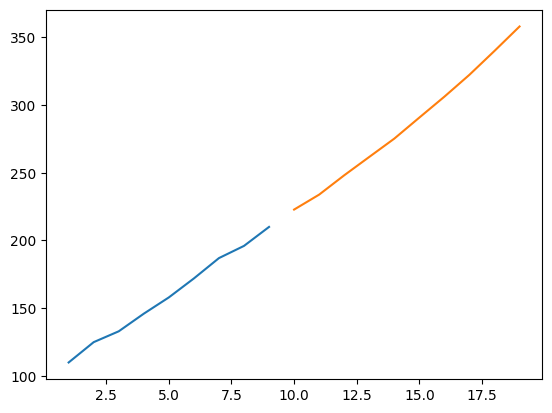

In [25]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)